# Linear Regression with Python's Scikit-learn

## Exploratory Data Analysis

Let's start with exploratory data analysis. You want to get to know your data first - this includes loading it in, visualizing features, exploring their relationships and making hypotheses based on your observations. The dataset is a CSV (comma-separated values) file, which contains the hours studied and the scores obtained based on those hours. We'll load the data into a **DataFrame** using Pandas:

In [3]:
## TODO
import pandas as pd
import matplotlib.pyplot as plt

Let's read the **student_scores.csv** file and package it into a DataFrame:

In [4]:
## TODO
df = pd.read_csv('datasets/student_scores.csv')

Once the data is loaded in, let's take a quick peek at the first 5 values using the **head()** method:

In [5]:
## TODO
df.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


The results should be:
![linear_regression](img/1.png)

We can also check the shape of our dataset via the **shape** property:

In [6]:
## TODO
df.shape

(25, 2)

In essence, we're asking for the relationship between Hours and Scores. So, what's the relationship between these variables? We'll **plot the hours on the X-axis and scores on the Y-axis**, and for each pair, a marker will be positioned based on their values. X label is `Hours`, y title is `Scores` and the figure title is `Scatterplot of hours and scores percentages`.

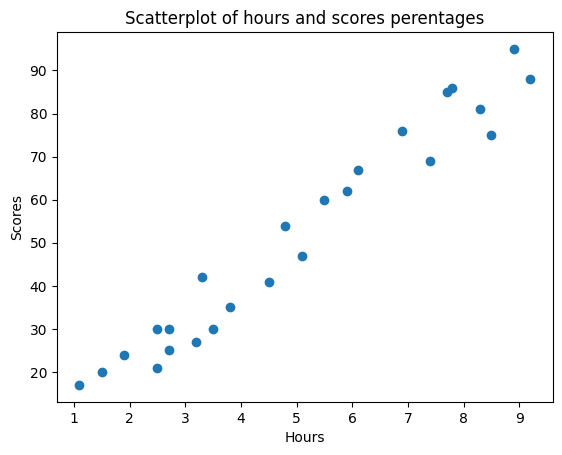

In [7]:
# TODO
plt.scatter(df.Hours, df.Scores)
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Scatterplot of hours and scores perentages')
plt.show()

This results in:

![linear_regression](img/2.png)

The **corr()** method calculates and displays the correlations between numerical variables in a **DataFrame**:

In [8]:
## TODO
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


The results should be:

![linear_regression](img/3.png)

As the hours increase, so do the scores. There's a fairly high positive correlation here! Since the shape of the line the points are making appears to be straight - we say that there's a **positive linear correlation** between the Hours and Scores variables.

However, in this table, the correlation between Scores and Hours is `0.97`. Anything above `0.8` is considered to be a strong positive correlation.

Pandas also ships with a great helper method for statistical summaries, and we can **describe()** the dataset to get an idea of the mean, maximum, minimum, etc. values of our columns:

In [9]:
# TODO
df.describe()


,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


The results should be:

![linear_regression](img/4.png)

## Data Preprocessing

To separate the target and features, we can attribute the dataframe column values to our `y` and `X` variables:

In [10]:
## TODO
Y = df.drop('Hours', axis= 1)
X = df.drop('Scores', axis=1)

This is easily achieved through the helper **train_test_split()** method, which accepts our X and y arrays (also works on **DataFrames** and splits a single **DataFrame** into training and testing sets), and a `test_size`. The `test_size` is the percentage of the overall data we'll be using for testing:

In [11]:
## TODO
# Use these variables: X_train, X_test, y_train, y_test 
# and test_size = 0.2, random_state = 99
import sklearn
import sklearn.linear_model

X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, Y, test_size = 0.2, random_state = 42)


Now, if you print your `X_train` array - you'll find the study hours, and `y_train` contains the score percentages:

In [12]:
## TODO
print("study hours")
X_train.head(10)

study hours


,Hours
9,2.7
13,3.3
1,5.1
22,3.8
5,1.5
2,3.2
12,4.5
15,8.9
3,8.5
4,3.5


In [13]:
print("the score percentages")
Y_train.head(10)

the score percentages


,Scores
9,25
13,42
1,47
22,35
5,20
2,27
12,41
15,95
3,75
4,30


## Training a Linear Regression Model

We have our train and test sets ready. Scikit-Learn has a plethora of model types we can easily import and train, **LinearRegression** being one of them:

In [14]:
## TODO
regr = sklearn.linear_model.LinearRegression()

Now, we need to fit the line to our data, we will do that by using the **.fit()** method along with our `X_train` and `y_train` data:

In [15]:
## TODO
regr.fit(X_train, Y_train)

LinearRegression()

If no errors are thrown - the regressor found the best fitting line! The line is defined by our features and the intercept/slope. In fact, we can inspect the intercept and slope by printing the `regressor.intecept_` and `regressor.coef_` attributes, respectively:

In [16]:
## TODO
print(regr.coef_ )
print(regr.intercept_)
## ----> 2.82689235

[[9.68207815]]
[2.82689235]


This can quite literally be plugged in into our formula from before:
$$\text{score}=9.68207815*\text{hour}+2.82689235$$

## Making Predictions

To avoid running calculations ourselves, we could write our own formula that calculates the value:

In [17]:
## TODO
# name of function will be 'calc' 
# with three inputs: slope, intercept, and hours
# return with formula of linear regression

def calc(slope, intercept, hours):
    predicted_score = slope * hours + intercept
    return predicted_score


However - a much handier way to predict new values using our model is to call on the `predict()` function:

In [18]:
## TODO
# call on the predict() form regression and print the result.
# Note: Passing 9.5 in double brackets to have a 2 dimensional array

predicted_score_9_5_hours = regr.predict([[9.5]])
print(predicted_score_9_5_hours)

# 94.80663482

[[94.80663482]]


c:\Users\tontide1\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Our result is `94.80663482`, or approximately `95%`. Now we have a score percentage estimate for each and every hours we can think of. But can we trust those estimates? In the answer to that question is the reason why we split the data into train and test in the first place. Now we can predict using our test data and compare the predicted with our actual results - the **ground truth** results.

To make predictions on the test data, we pass the `X_test` values to the **predict()** method. We can assign the results to the variable `y_pred`:

In [19]:
## TODO
y_pred = regr.predict(X_test)

The `y_pred` variable now contains all the predicted values for the input values in the `X_test`. We can now compare the actual output values for `X_test` with the predicted values, by arranging them side by side in a dataframe structure:

In [20]:
df_preds = pd.DataFrame({'Actual': Y_test.squeeze(), 'Predicted': y_pred.squeeze()})
print(df_preds)

    Actual  Predicted
8       81  83.188141
16      30  27.032088
0       21  27.032088
23      76  69.633232
11      62  59.951153


The output looks like this:
![linear_regression](img/LR_4.png)

Though our model seems not to be very precise, the predicted percentages are close to the actual ones. Let's quantify the difference between the actual and predicted values to gain an objective view of how it's actually performing.

## Evaluating the Model

After looking at the data, seeing a linear relationship, training and testing our model, we can understand how well it predicts by using some metrics. For regression models, three evaluation metrics are mainly used:

1. **Mean Absolute Error (MAE)**: When we subtract the predicted values from the actual values, obtaining the errors, sum the absolute values of those errors and get their mean. This metric gives a notion of the overall error for each prediction of the model, the smaller (closer to 0) the better.
$$\displaystyle \text{MAE}=\dfrac{1}{n}\sum_{i=1}^n\left| \text{Actual} - \text{Predicted} \right|$$
2. **Mean Squared Error (MSE)**: It is similar to the MAE metric, but it squares the absolute values of the errors. Also, as with MAE, the smaller, or closer to 0, the better. The MSE value is squared so as to make large errors even larger. One thing to pay close attention to, it that it is usually a hard metric to interpret due to the size of its values and of the fact that they aren't in the same scale of the data.
$$\displaystyle \text{MSE}=\sum_{i=1}^n\left( \text{Actual} - \text{Predicted} \right)^2$$
3. **Root Mean Squared Error (RMSE)**: Tries to solve the interpretation problem raised with the MSE by getting the square root of its final value, so as to scale it back to the same units of the data. It is easier to interpret and good when we need to display or show the actual value of the data with the error.
$$\displaystyle \text{RMSE}=\sqrt{\sum_{i=1}^n\left( \text{Actual} - \text{Predicted} \right)^2}$$

Luckily, we don't have to do any of the metrics calculations manually. The Scikit-Learn package already comes with functions that can be used to find out the values of these metrics for us. Let's find the values for these metrics using our test data. First, we will import the necessary modules for calculating the MAE and MSE errors. Respectively, the `mean_absolute_error` and `mean_squared_error`:

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

Now, we can calculate the MAE and MSE by passing the `y_test` (actual) and `y_pred` (predicted) to the methods. The RMSE can be calculated by taking the square root of the MSE, to to that, we will use NumPy's sqrt() method:

In [22]:
import numpy as np
# TODO
y_pred = regr.predict(X_test)
mae = mean_absolute_error(Y_test, y_pred)
mse = mean_squared_error(Y_test, y_pred)
rmse = np.sqrt(mse)

We will also print the metrics results using the `f` string and the 2 digit precision after the comma with `:.2f`:

In [23]:
# TODO
print("Mean Absolute Error (MAE):", round(mae, 2))
print("Mean Squared Error (MSE):", round(mse, 2))
print("Root Mean Squared Error (RMSE):", round(rmse, 2))


Mean Absolute Error (MAE): 3.92
Mean Squared Error (MSE): 18.94
Root Mean Squared Error (RMSE): 4.35


The result should be:
The output looks like this:
![linear_regression](img/5.png)

# Multiple Linear Regression

Until this point, we have predicted a value with linear regression using only one variable. There is a different scenario that we can consider, where we can predict using many variables instead of one, and this is also a much more common scenario in real life, where many things can affect some result. In a case like this, when it makes sense to use multiple variables, linear regression becomes a **multiple linear regression**.

## Exploratory Data Analysis

Following what we did with the linear regression, we will also want to know our data before applying multiple linear regression. First, we can import the data with pandas **read_csv()** method for `petrol_consumption.csv` datasets:

In [24]:
# TODO
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('datasets/petrol_consumption.csv')

We can now take a look at the first five rows with `df.head()` and  how many rows and columns our data has with `shape`:

In [25]:
# TODO
df.head()


,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


This results in:

![linear_regression](img/6.png)

This time, we will facilitate the comparison of the statistics by rounding up the values to two decimals with the `round()` method, and transposing the table with the `T` property:

In [26]:
# TODO
print(df.describe().round(2).T)


                              count     mean      std      min      25%  \
Petrol_tax                     48.0     7.67     0.95     5.00     7.00   
Average_income                 48.0  4241.83   573.62  3063.00  3739.00   
Paved_Highways                 48.0  5565.42  3491.51   431.00  3110.25   
Population_Driver_licence(%)   48.0     0.57     0.06     0.45     0.53   
Petrol_Consumption             48.0   576.77   111.89   344.00   509.50   

                                  50%      75%       max  
Petrol_tax                       7.50     8.12     10.00  
Average_income                4298.00  4578.75   5342.00  
Paved_Highways                4735.50  7156.00  17782.00  
Population_Driver_licence(%)     0.56     0.60      0.72  
Petrol_Consumption             568.50   632.75    968.00  


Our table is now column-wide instead of being row-wide:
![linear_regression](img/MLR_1.png)

By looking at the min and max columns of the describe table, we see that the minimum value in our data is `0.45`, and the maximum value is `17,782`. This means that our data range is `17,781.55` (`17,782 - 0.45 = 17,781.55`), very wide - which implies our data variability is also high.

Also, by comparing the values of the mean and std columns, such as `7.67` and `0.95`, `4241.83` and `573.62`, etc., we can see that the means are really far from the standard deviations. That implies our data is far from the mean, decentralized - which also adds to the variability.

Another example of a coefficient being the same between differing relationships is Pearson Correlation (which checks for **linear correlation**):
![linear_regression](img/MLR_2.png)

This time, we will use **Seaborn**, an extension of Matplotlib which Pandas uses under the hood when plotting:

In [27]:
!pip install seaborn

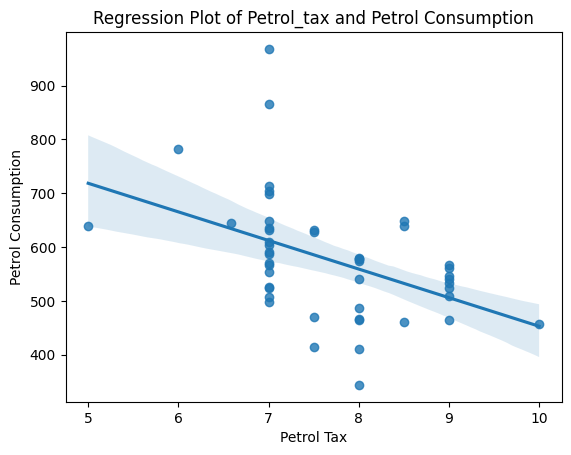

In [28]:
# TODO
import seaborn as sns

sns.regplot(x='Petrol_tax', y='Petrol_Consumption', data=df)

plt.title('Regression Plot of Petrol_tax and Petrol Consumption')
plt.xlabel('Petrol Tax')
plt.ylabel('Petrol Consumption')
plt.show()

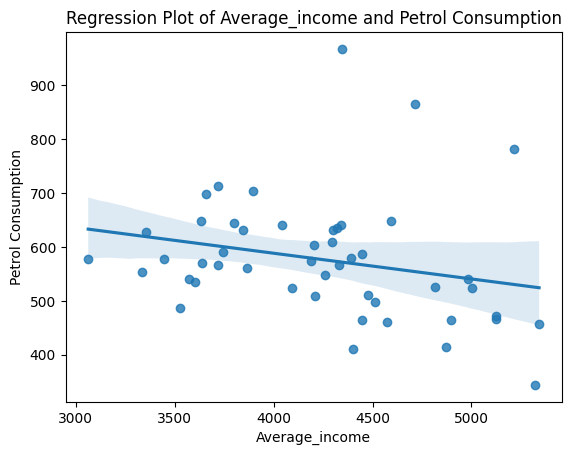

In [29]:
sns.regplot(x='Average_income', y='Petrol_Consumption', data=df)

plt.title('Regression Plot of Average_income and Petrol Consumption')
plt.xlabel('Average_income')
plt.ylabel('Petrol Consumption')
plt.show()

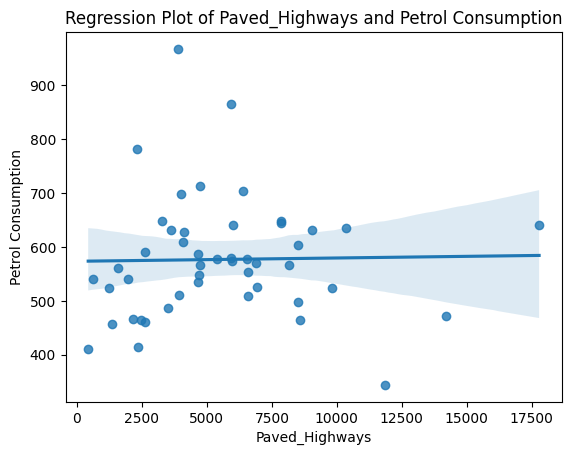

In [30]:
sns.regplot(x='Paved_Highways', y='Petrol_Consumption', data=df)

plt.title('Regression Plot of Paved_Highways and Petrol Consumption')
plt.xlabel('Paved_Highways')
plt.ylabel('Petrol Consumption')
plt.show()

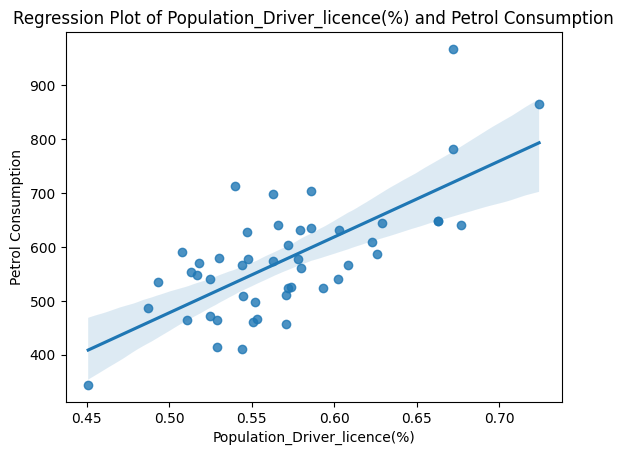

In [31]:
sns.regplot(x='Population_Driver_licence(%)', y='Petrol_Consumption', data=df)

plt.title('Regression Plot of Population_Driver_licence(%) and Petrol Consumption')
plt.xlabel('Population_Driver_licence(%)')
plt.ylabel('Petrol Consumption')
plt.show()

When looking at the regplots, it seems the `Petrol_tax` and `Average_income` have a weak negative linear relationship with `Petrol_Consumption`. It also seems that the `Population_Driver_license(%)` has a strong positive linear relationship with `Petrol_Consumption`, and that the `Paved_Highways` variable has no relationship with `Petrol_Consumption`.

We can also calculate the correlation of the new variables, this time using Seaborn's `heatmap()` to help us spot the strongest and weaker correlations based on warmer (reds) and cooler (blues) tones:

In [32]:
correlations = df.corr()
# annot=True displays the correlation values



Result:
![linear_regression](img/7.png)

It seems that the heatmap corroborates our previous analysis! `Petrol_tax` and `Average_income` have a weak negative linear relationship of, respectively, `-0.45` and `-0.24` with `Petrol_Consumption`. `Population_Driver_license(%)` has a strong positive linear relationship of `0.7` with `Petrol_Consumption`, and `Paved_Highways` correlation is of `0.019` - which indicates no relationship with `Petrol_Consumption`.

Another important thing to notice in the regplots is that there are some points really far off from where most points concentrate, we were already expecting something like that after the big difference between the mean and std columns - those points might be data outliers and extreme values.

![linear_regression](img/MLR_3.png)

The multiple linear regression formula is basically an extension of the linear regression formula with more slope values:
$$y=b_0+b_1*x_1+b_2*x_2+...++b_n*x_n+\epsilon$$

We have learned a lot about linear models and exploratory data analysis, now it's time to use the `Average_income`, `Paved_Highways`, `Population_Driver_license(%)` and `Petrol_tax` as independent variables of our model and see what happens.

## Preparing the Data

We can use double brackets `[[ ]]` to select them from the dataframe:

In [33]:
y = df['Petrol_Consumption']
X = df[['Average_income', 'Paved_Highways',
       'Population_Driver_licence(%)', 'Petrol_tax']]

After setting our `X` and `y` sets, we can divide our data into train and test sets. We will be using the same seed and `20%` of our data for training:

In [34]:
# TODO
import sklearn.model_selection

X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2, random_state=42)


## Training the Multivariate Model

To train our model we can execute the same code as before, and use the **fit()** method of the LinearRegression class, then use `regressor.intercept_` and `regressor.coef_`:

In [35]:
# TODO
regr = sklearn.linear_model.LinearRegression()
regr.fit(X_train, Y_train)


LinearRegression()

Those four values are the coefficients for each of our features in the same order as we have them in our `X` data. To see a list with their names, we can use the dataframe `columns` attribute:

In [36]:
feature_names = X.columns

To do that, we can assign our column names to a `feature_names` variable, and our coefficients to a `model_coefficients` variable. After that, we can create a dataframe with our features as an index and our coefficients as column values called `coefficients_df`:

In [37]:
# TODO
print(regr.intercept_)
print(regr.coef_ )


# regressor.intercept_ -> 361.45087906668397
# regressor.coef_ -> [-5.65355145e-02, -4.38217137e-03,  1.34686930e+03, -3.69937459e+01]

361.4508790666839
[-5.65355145e-02 -4.38217137e-03  1.34686930e+03 -3.69937459e+01]


The final `DataFrame` should look like this:

![linear_regression](img/MLR_4.png)

## Making Predictions with the Multivariate Regression Model

To understand if and how our model is making mistakes, we can predict the gas consumption using our test data and then look at our metrics to be able to tell how well our model is behaving.

In the same way we had done for the simple regression model, let's predict with the test data:

In [38]:
# TODO
y_pred = regr.predict(X_test)

Now, that we have our test predictions, we can better compare them with the actual output values for `X_test` by organizing them in a `DataFrameformat`:

In [39]:
# TODO

comparison_df = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})

print(comparison_df)

    Actual   Predicted
27     631  606.692665
40     587  673.779442
26     577  584.991490
43     591  563.536910
24     460  519.058672
37     704  643.461003
12     525  572.897614
19     640  687.077036
4      410  547.609366
25     566  530.037630


The output should look like this:
    
![linear_regression](img/MLR_5.png)

## Evaluating the Multivariate Model

After exploring, training and looking at our model predictions - our final step is to evaluate the performance of our multiple linear regression. We want to understand if our predicted values are too far from our actual values. We'll do this in the same way we had previously done, by calculating the **MAE, MSE and RMSE** metrics.

So, let's execute the following code:

In [40]:
# TODO

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(Y_test, y_pred)
mse = mean_squared_error(Y_test, y_pred)
rmse = np.sqrt(mse)


print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")

Mean Absolute Error: 53.47
Mean Squared Error: 4083.26
Root Mean Squared Error: 63.90


The output of our metrics should be:

![Multivariate Model](img/8.png)

To dig further into what is happening to our model, we can look at a metric that measures the model in a different way, it doesn't consider our individual data values such as MSE, RMSE and MAE, but takes a more general approach to the error:
$$R^2=1-\dfrac{\sum\left( \text{Actual}-\text{Predicted} \right)^2}{\sum\left( \text{Actual}-\text{Actual Mean} \right)^2}$$

In other words, $R^2$ quantifies how much of the variance of the dependent variable is being explained by the model.

The $R^2$ metric varies from 0% to 100%. The closer to 100%, the better. If the $R^2$ value is negative, it means it doesn't explain the target at all.

We can calculate $R^2$ in Python to get a better understanding of how it works:


In [45]:
# TODO
r2 = 1 - (sum((Y_test - y_pred)**2) / sum((Y_test - ))


$R^2$ also comes implemented by default into the `score` method of Scikit-Learn's linear regressor class. We can calculate it like this:

In [44]:
print(f"R-squared: {r2:.2f}")
# -> 0.39136640014305457

R-squared: 0.39


So far, it seems that our current model explains only `39%` of our test data which is not a good result, it means it leaves `61%` of the test data unexplained.

Let's also understand how much our model explains of our train data:

In [ ]:
regressor.score(X_train, y_train)
# -> 0.7068781342155135

We have found an issue with our model. It explains `70%` of the train data, but only 39% of our test data, which is more important to get right than our train data. It is fitting the train data really well, and not being able to fit the test data - which means, we have an overfitted multiple linear regression model.

There are many factors that may have contributed to this, a few of them could be:
<ol>
<li>Need for more data: we have only one year worth of data (and only 48 rows), which isn't that much, whereas having multiple years of data could have helped improve the prediction results quite a bit.</li>
<li>Overcome overfitting: we can use a cross validation that will fit our model to different shuffled samples of our dataset to try to end overfitting.</li>
<il>Assumptions that don't hold: we have made the assumption that the data had a linear relationship, but that might not be the case. Visualizing the data using boxplots, understanding the data distribution, treating the outliers, and normalizing it may help with that.</il>
<li>Poor features: we might need other or more features that have strongest relationships with values we are trying to predict.</li>
    </ol>

# GOOD LUCK!